# 1.Librerias

In [108]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
#from wordcloud import WordCloud



# 2.Datos

In [145]:
train = pd.read_csv('./data/train/train.csv')
color_labels=pd.read_csv('./data/color_labels.csv')
state_labels=pd.read_csv('./data/state_labels.csv')


train = pd.merge(train, state_labels, how='left', left_on='State', right_on='StateID')



# 3.Analisìs Basico

In [146]:
print("Train - Filas y Columnas: ",train.shape)
print("Color Labels - Filas y Columnas: ",color_labels.shape)
print("States - Filas y Columnas: ",state_labels.shape)

Train - Filas y Columnas:  (14993, 26)
Color Labels - Filas y Columnas:  (7, 2)
States - Filas y Columnas:  (15, 2)


In [148]:
train.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,...,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed,StateID
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,...,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,...,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441,41346.028347
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,...,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265,32.444153
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000,41324.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000,41326.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000,41326.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,...,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000,41401.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,...,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000,41415.000000


### 3.1 Train Head

In [149]:
train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,StateID,StateName
0,2,Nibble,3,299,0,1,1,7,0,1,...,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,41326,Selangor
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,41401,Kuala Lumpur
2,1,Brisco,1,307,0,1,2,7,0,2,...,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,41326,Selangor
3,1,Miko,4,307,0,2,1,2,0,2,...,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,41401,Kuala Lumpur
4,1,Hunter,1,307,0,1,1,0,0,2,...,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,41326,Selangor


### 3.2 Color Labels

In [113]:
print(color_labels)

   ColorID ColorName
0        1     Black
1        2     Brown
2        3    Golden
3        4    Yellow
4        5     Cream
5        6      Gray
6        7     White


### 3.3 State Labels

In [114]:
print(state_labels)

    StateID        StateName
0     41336            Johor
1     41325            Kedah
2     41367         Kelantan
3     41401     Kuala Lumpur
4     41415           Labuan
5     41324           Melaka
6     41332  Negeri Sembilan
7     41335           Pahang
8     41330            Perak
9     41380           Perlis
10    41327     Pulau Pinang
11    41345            Sabah
12    41342          Sarawak
13    41326         Selangor
14    41361       Terengganu


3.4 Mapeo de Campos 

In [150]:
train['MaturitySize'] = train['MaturitySize'].apply(lambda x: 'Small' if x == 1 
                                                    else 'Medium' if x == 2 
                                                    else 'Large' if x == 3 
                                                    else 'Extra Large' if x == 4 
                                                    else 'Not Specified' if x == 0 
                                                    else 'Unknown')  # Por si hay otros valores inesperados

train['FurLength'] = train['FurLength'].apply(lambda x: 'Short' if x == 1 
                                                    else 'Medium' if x == 2 
                                                    else 'Long' if x == 3 
                                                    else 'Not Specified' if x == 0 
                                                    else 'Unknown')  # Por si hay otros valores inesperados

train['Vaccinated'] = train['Vaccinated'].apply(lambda x: 'Yes' if x == 1 
                                                    else 'No' if x == 2 
                                                    else 'Not Sure' if x == 3 
                                                    else 'Unknown')  # Por si hay otros valores inesperados
train['Dewormed'] = train['Dewormed'].apply(lambda x: 'Yes' if x == 1 
                                                    else 'No' if x == 2 
                                                    else 'Not Sure' if x == 3 
                                                    else 'Unknown')  # Por si hay otros valores inesperados
train['Sterilized'] = train['Sterilized'].apply(lambda x: 'Yes' if x == 1 
                                                    else 'No' if x == 2 
                                                    else 'Not Sure' if x == 3 
                                                    else 'Unknown')  # Por si hay otros valores inesperados
train['Health'] = train['Health'].apply(lambda x: 'Healthy' if x == 1 
                                                    else 'Minor Injury' if x == 2 
                                                    else 'Serious Injury' if x == 3 
                                                    else 'Not Specified' if x == 0 
                                                    else 'Unknown')  # Por si hay otros valores inesperados

# 4. Analisis Exploratorio

La idea es usar herramientas estadisticas y de visualizacion  para:
    * Crear un mapa mental del set de datos (entenderlo)
    * Empezar a encontrar respuestas a la pregunta xxx

**Lo voy a plantear en 3 fases:**

1. Analisis de cada variable de manera individual
2. Analisis univariado: relacion de cada variable predictora con la variable a predecir.
3. Analisis bivariado: relacion de pares de variables predictoras con la variable a predecir.


## 4.1  Analisis de cada variable de manera individual

Nos permite entender las caracteristicas generales de cada variable de nuestro set de datos

In [151]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  object 
 10  FurLength      14993 non-null  object 
 11  Vaccinated     14993 non-null  object 
 12  Dewormed       14993 non-null  object 
 13  Sterilized     14993 non-null  object 
 14  Health         14993 non-null  object 
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

**Target: Adoption speed**

0. Pet was adopted on the same day as it was listed.
1. Pet was adopted between 1 and 7 days (1st week) after being listed.
2. Pet was adopted between 8 and 30 days (1st month) after being listed.
3. Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
4. No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).




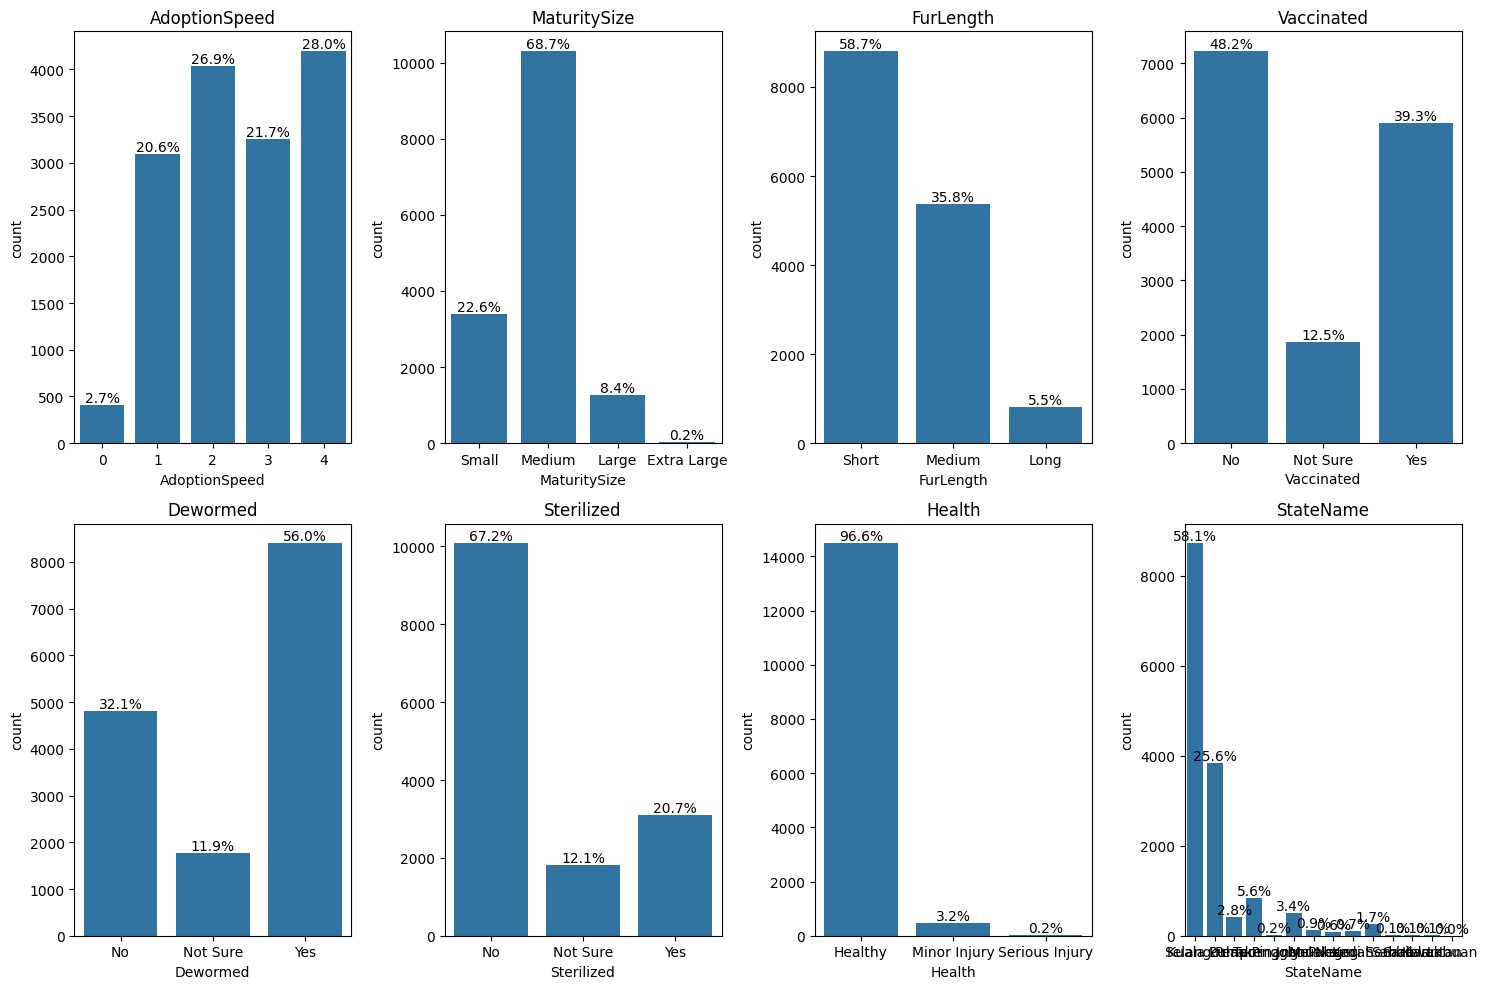

In [165]:
variables_categoricas=['AdoptionSpeed','MaturitySize','FurLength','Vaccinated','Dewormed','Sterilized','Health','StateName']

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

ax = ax.flatten()

# Calculo el total de registros en el dataset
total = len(train)

for i, col in enumerate(variables_categoricas):
    # Crear el gráfico de barras con seaborn en el subplot correspondiente
    sns.countplot(x=col, data=train, ax=ax[i])
       
    for p in ax[i].patches:
        count = p.get_height()  # Obtener la cantidad de la categoría
        percentage = 100 * count / total  # Calcular el porcentaje
        ax[i].annotate(f'{percentage:.1f}%', 
                       (p.get_x() + p.get_width() / 2, count),  # Ubicación del texto
                       ha='center', va='bottom')  # Centrado en la barra

    ax[i].set_title(col)

plt.tight_layout()
plt.show()

Analizando las mascotas vemos que hay mas Perros que Gatos en adopcion

/tmp/ipykernel_4797/3455353624.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['1-Dog','2-Cat'])
/tmp/ipykernel_4797/3455353624.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['1-Dog','2-Cat'])


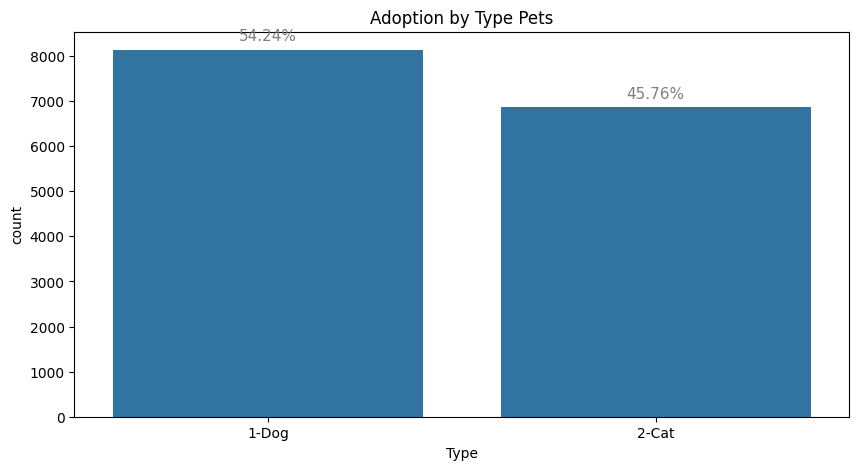

In [118]:
plt.figure(figsize=(10, 5));
g = sns.countplot(x='Type', data=train)
plt.title('Adoption by Type Pets');
ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / train.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points') 
     ax.set_xticklabels(['1-Dog','2-Cat']) 

Comportamiento de variables Numericas (Age, Fee)

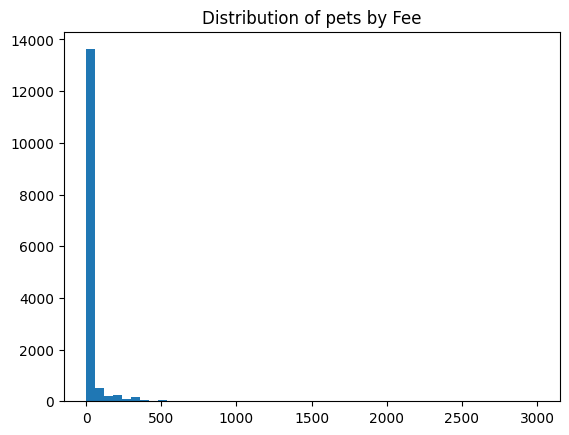

In [159]:
fig, ax = plt.subplots()

plt.hist(train['Fee'],bins=50)
plt.title('Distribution of pets by Fee');

En el histograma podemos observar que la mayoria de los gatos en nuestros datos son menores a 50 meses

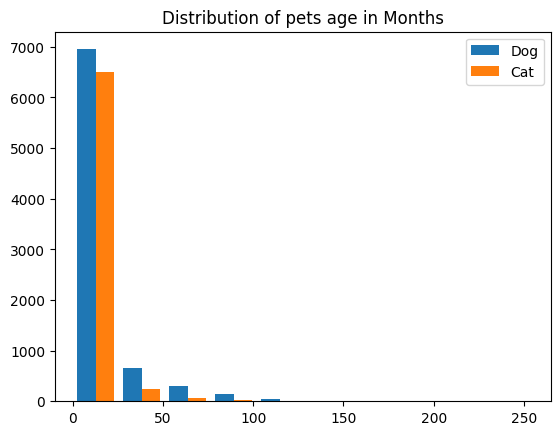

In [119]:
bins = [0,12,24,36,48,60,72,84,120]
fig, ax = plt.subplots()

age_dogs=train[train['Type'] == 1]['Age'] 
age_cats=train[train['Type'] == 2]['Age'] 

#plt.hist([age_dogs,age_cats],bins = bins)
plt.hist([age_dogs,age_cats])
plt.legend(["Dog","Cat"])
plt.title('Distribution of pets age in Months');

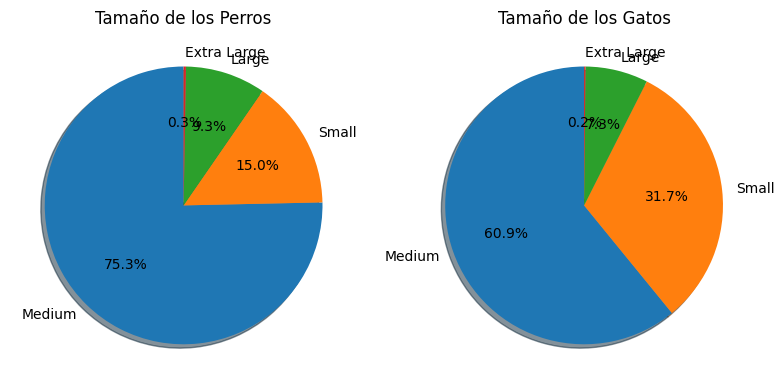

In [161]:

size_type_1 = train[train['Type'] == 1]['MaturitySize']
size_type_2 = train[train['Type'] == 2]['MaturitySize']

conteo_categorias_1 = size_type_1.value_counts()
conteo_categorias_2 = size_type_2.value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.pie(conteo_categorias_1.values, labels=conteo_categorias_1.index, autopct='%1.1f%%', startangle=90,shadow=True )
ax1.set_title('Tamaño de los Perros')

ax2.pie(conteo_categorias_2.values, labels=conteo_categorias_2.index, autopct='%1.1f%%', startangle=90,shadow=True)
ax2.set_title('Tamaño de los Gatos')

plt.tight_layout()

# Mostrar los gráficos
plt.show()


Analisis por ciudades

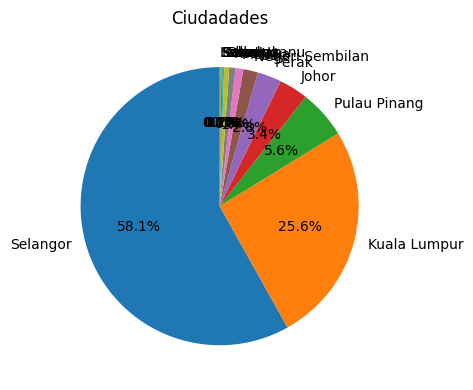

In [154]:
conteo_categorias = train['StateName'].value_counts()

fig, ax1 = plt.subplots(figsize=(8, 4))

ax1.pie(conteo_categorias.values, labels=conteo_categorias.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Ciudadades')

plt.tight_layout()

# Mostrar los gráficos
plt.show()


**Observaciones**
* Adoption Speed:En esta variable podemos ver que menos del 3% de las mascotas fueron adoptadas el mismo dia que se incuyeron en la lista. Un 50% de las mascotas son adoptadas durante el primer mes que son publicadas. Esto puede demostrar un alto interes de las personas por adoptar
* Maturity Size: el 80% de las mascotas son de tamaño small y medium, siendo esta ultima el tamaño con mas mascotas 69%.
* Furlengh: Esta variable nos indica que màs de la mitad de las mascotas tienen el pelo "short", "medium" un %36 y un %5 tiene el pelo largo.
* Salud: Las graficas nos muestran que 48% de las mascotas no estan vacunadas y teniendo en cuenta el dato de las "Not Sure", se puede decir que mas de la mitad de las mascotas no estan vacunadas.Es contradictorio con el campo "Dewormed" lo que indica que mas de un 50% de las mascotas estan desparasitadas. Sera mas economico desparasitar que vacunar?
La variable "Sterilized" nos muestra que hay un alto porcentaje de mascotas sin castrar. +67% +- 70% lo que puede traer consecuencias en la reproducciòn masiva.
Helth: Esta variable nos muestra que la mayoria de las mascotas estan bien de salud, esto puede estar relacionada a la edad de las mascotas.


